In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
new_york=pd.read_csv('AB_NYC_2019.csv')

In [3]:
new_york.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
new_york.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
new_york.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
new_york.fillna({'reviews_per_month':0},inplace=True)
new_york['reviews_per_month'].isnull().sum()

0

In [7]:
new_york['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [8]:
new_york['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
new_york['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [10]:
print("Total unique hosts : "+str(new_york['host_id'].unique().shape[0]))
top_hosts=new_york['host_id'].value_counts().head(15)
print(top_hosts)

Total unique hosts : 37457
219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64


In [11]:
top_host_check=new_york['calculated_host_listings_count'].max()
print(top_host_check)

327


In [12]:
sns.set(rc={'figure.figsize':(10,8)})

Text(0,0.5,'Count of Listings')

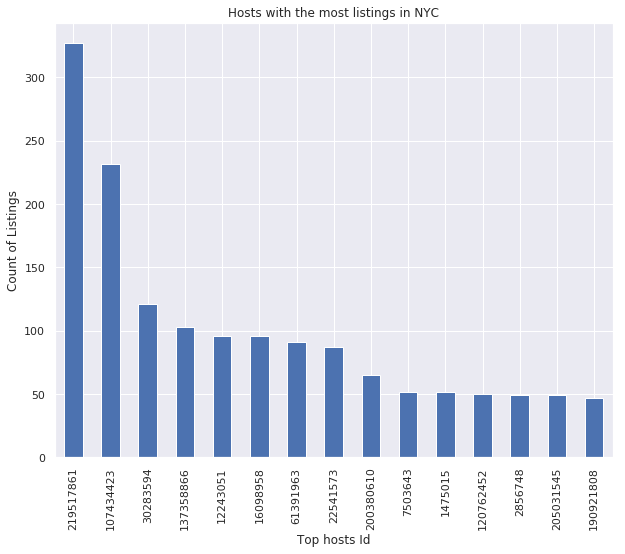

In [13]:
vis1=top_hosts.plot(kind='bar')
vis1.set_title('Hosts with the most listings in NYC')
vis1.set_xlabel('Top hosts Id')
vis1.set_ylabel('Count of Listings')

In [14]:
sub1=new_york.loc[new_york['neighbourhood_group']=='Brooklyn']
price1=sub1[['price']]
sub2=new_york.loc[new_york['neighbourhood_group']=='Manhattan']
price2=sub2[['price']]
sub3=new_york.loc[new_york['neighbourhood_group']=='Queens']
price3=sub3[['price']]
sub4=new_york.loc[new_york['neighbourhood_group']=='Staten Island']
price4=sub4[['price']]
sub5=new_york.loc[new_york['neighbourhood_group']=='Bronx']
price5=sub5[['price']]
price_list=[price1,price2,price3,price4,price5]

In [15]:
neighborhood_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
print(price1.describe())
print(price2.describe())
print(price3.describe())
print(price4.describe())
print(price5.describe())

              price
count  20104.000000
mean     124.383207
std      186.873538
min        0.000000
25%       60.000000
50%       90.000000
75%      150.000000
max    10000.000000
              price
count  21661.000000
mean     196.875814
std      291.383183
min        0.000000
25%       95.000000
50%      150.000000
75%      220.000000
max    10000.000000
              price
count   5666.000000
mean      99.517649
std      167.102155
min       10.000000
25%       50.000000
50%       75.000000
75%      110.000000
max    10000.000000
             price
count   373.000000
mean    114.812332
std     277.620403
min      13.000000
25%      50.000000
50%      75.000000
75%     110.000000
max    5000.000000
             price
count  1091.000000
mean     87.496792
std     106.709349
min       0.000000
25%      45.000000
50%      65.000000
75%      99.000000
max    2500.000000


# Calculating upper fence for these prices to remove outliers to better analyze data 

In [16]:
iqr1=150-60
iqr2=220-95
iqr3=110-50
iqr4=110-50
iqr5=99-45
up1=150+1.5*iqr1
up2=220+1.5*iqr2
up3=110+1.5*iqr3
up4=110+1.5*iqr4
up5=99+1.5*iqr5
print("Upper fence for price1 is " + str(up1))
print("Upper fence for price2 is " + str(up2))
print("Upper fence for price3 is " + str(up3))
print("Upper fence for price4 is " + str(up4))
print("Upper fence for price5 is " + str(up5))

Upper fence for price1 is 285.0
Upper fence for price2 is 407.5
Upper fence for price3 is 200.0
Upper fence for price4 is 200.0
Upper fence for price5 is 180.0


Text(0.5,1,'Distribution of prices for each price group')

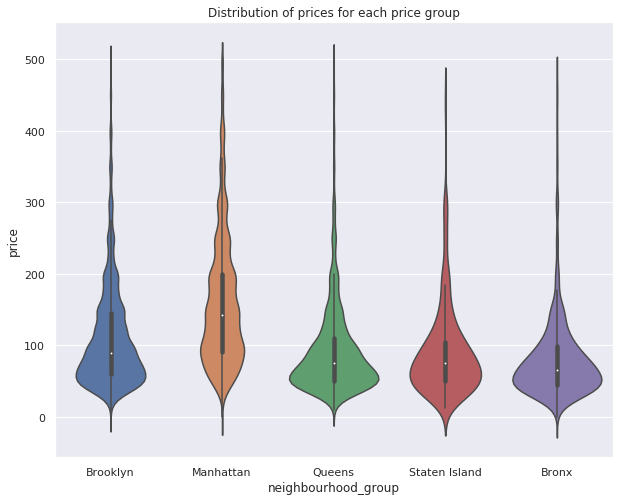

In [17]:
sub6=new_york[new_york.price<500]
vis2=sns.violinplot(data=sub6,x='neighbourhood_group',y='price')
vis2.set_title('Distribution of prices for each price group')

In [18]:
new_york['neighbourhood'].value_counts().mean()

221.2443438914027

In [19]:
new_york['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

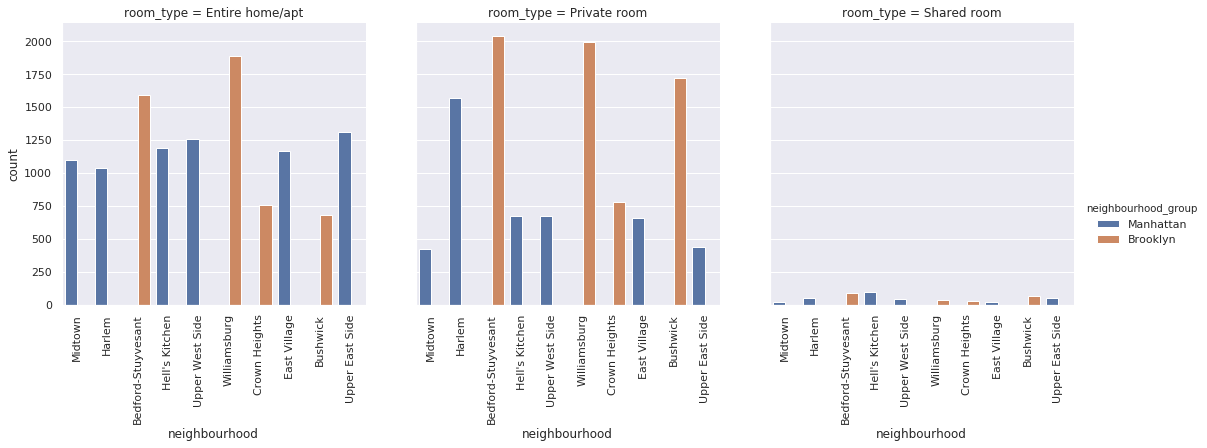

In [20]:
sub7=new_york.loc[new_york['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
vis3=sns.catplot(data=sub7,x='neighbourhood',hue='neighbourhood_group',col='room_type',kind="count")
vis3.set_xticklabels(rotation=90)

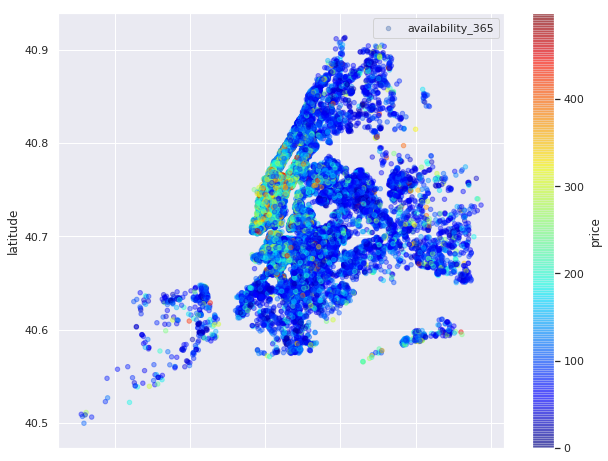

In [21]:
vis4=sub6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
vis4.legend()

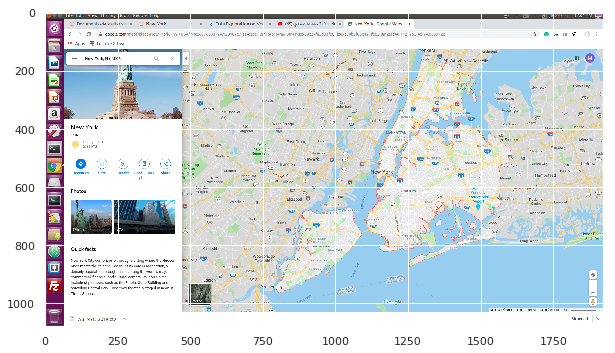

In [22]:
image=plt.imread('nyc_map')
plt.imshow(image)
plt.show()

# Compare this map with above points

# Average price per night

In [23]:
total_price=sub6['price'].sum()

In [24]:
total_nights=sub6['minimum_nights'].sum()

In [25]:
average_price_per_night=total_price/total_nights

In [26]:
print(average_price_per_night)  #incudes every hotel of every rating but of price range<500

18.637451289329356


In [27]:
sub6['number_of_reviews'].describe()

count    47660.000000
mean        23.593957
std         44.870894
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64